***
# **<center>COURS PYTHON 2IMACS #7</center>**
# ***<center>Pandas</center>***

***

Pandas est une bibliothèque utilisée pour la manipulation et l'analyse des données. Elle offre des structures de données efficaces (les DataFrames) pour organiser, filtrer, trier et agréger les données. Pandas facilite également l'importation et l'exportation de données à partir de divers formats, tels que CSV, Excel et bases de données.

In [1]:
import pandas as pd

# 7-1 Charger les données et premier apperçu

Chargeons les données à partir du fichier CSV. Pandas prend en charge de nombreux format des données dont le csv

In [2]:
df = pd.read_csv('fichiers_cours/pandas/WineQT.csv')

*Remarque: Ces données peuvent être téléchargées parmi des centaines de dataset sur le site https://www.kaggle.com/datasets .  
Ce site contient également de nobreux notebooks d'explorations de ces datasets, vous pouvez également y faire de compétitions de science des données!!!*

Affichons un aperçu des premières lignes du DataFrame

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Ce dataset contient des informations sur des vins portugais de type "Vinho Verde". Il a pour but de relier des propriétés chimiques à la qualité du vin.

| No. | Feature              | Type               | Description                                                                                                                  |
|-----|----------------------|--------------------|------------------------------------------------------------------------------------------------------------------------------|
| 1   | Fixed Acidity        | Numeric, Continuous | Amount of non-volatile acids present, contributes to the overall balance and freshness of wine's taste.                      |
| 2   | Volatile Acidity     | Numeric, Continuous | The portion of the wine's acidity that can be detected by smell.                                                             |
| 3   | Citric Acid          | Numeric, Continuous | Sometimes added to increase acidity and enhance flavor; also used in wine collection and filter cleaning.                     |
| 4   | Residual Sugar       | Numeric, Continuous | Sugar from the grapes that was not fermented into alcohol during the wine-making process.                                     |
| 5   | Chlorides            | Numeric, Continuous | Minerals that can influence the wine's taste, including salinity.                                                            |
| 6   | Free Sulfur Dioxide  | Numeric, Continuous | A preservative used for its antioxidant and antimicrobial properties; prevents growth of harmful microorganisms.             |
| 7   | Total Sulfur Dioxide | Numeric, Continuous | The total amount of sulfur dioxide present in the wine, whether free or bound to other compounds.                            |
| 8   | Density              | Numeric, Continuous | Determined by its alcohol and sugar concentrations. Most wines have a density less than water.                                |
| 9   | pH                   | Numeric, Continuous | A measure of the acidity of the wine. Wines typically have a pH level between 2.9 and 4.2.                                  |
| 10  | Sulphates            | Numeric, Continuous | A byproduct of the yeast fermentation process and are naturally present in all wines.                                       |
| 11  | Alcohol              | Numeric, Continuous | Influenced by factors such as the grape variety, the sugar content in the grapes, the production process, etc.               |
| 12  | Quality              | Numeric, Discrete  | An expert rating of the wine's overall quality.                                                                              |


On peut aller voir d'autres lignes avec iloc, par exemple de la 5<sup>ème</sup> à la 19<sup>ème</sup>.

In [4]:
df.iloc[5:20]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10
10,5.6,0.615,0.00,1.6,0.089,16.0,59.0,0.9943,3.58,0.52,9.9,5,12
11,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,13
12,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,16
13,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.9969,3.04,1.08,9.2,6,19
14,7.6,0.390,0.31,2.3,0.082,23.0,71.0,0.9982,3.52,0.65,9.7,5,21


Demandons les dimensions du tableau (nombre de lignes et de colonnes). Ce code renvoie un tuple contenant le nombre de lignes et de colonnes du DataFrame

In [5]:
df.shape

(1143, 13)

Et le nom des colonnes du DataFrame. Le tableau est de type numpy.ndarray.

In [6]:
df.columns.values 

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'Id'], dtype=object)

Pour obtenir une vision plus complète du jeu de données, demandons des statistiques sur les valeurs.

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1139.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311765,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.749462,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


| Statistique | Description |
|---|---|
| count |Le nombre de valeurs non nulles dans chaque colonne. |
| mean |La moyenne des valeurs dans chaque colonne. |
| std |L'écart type des valeurs dans chaque colonne. |
| min |La valeur minimale dans chaque colonne. |
| 25% |La valeur située au 25ème percentile dans chaque colonne. C'est-à-dire la valeur qui est supérieure à 25 % des valeurs de la colonne et inférieure à 75 % des valeurs de la colonne. |
| 50% |La valeur médiane dans chaque colonne. C'est-à-dire la valeur qui est supérieure à 50 % des valeurs de la colonne et inférieure à 50 % des valeurs de la colonne. |
| 75% |La valeur située au 75ème percentile dans chaque colonne. C'est-à-dire la valeur qui est supérieure à 75 % des valeurs de la colonne et inférieure à 25 % des valeurs de la colonne. |
| max |La valeur maximale dans chaque colonne. |

Les informations générales, en particulier les types de données contenus dans le dataframe

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1139 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Les données sont pour la plupart des floats, sauf la qualité et le numero qui sont des entiers. On remarque que l'on a 1139 valeurs dans fixed acidity et 1143 dans les autres. Il peut arriver que les jeux de données ne soient pas complets, de valeurs peuvent manquer. Vérifions avec **df.isnull**

# 7-2 Gestion des données manquantes

Comptons les valeurs manquantes par colonne

In [9]:
df.isnull().sum()

fixed acidity           4
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Nous avons plusieurs options:


| Opération                              | Description                                                                                    |
|----------------------------------------|------------------------------------------------------------------------------------------------|
| `df.dropna()`                          | Supprime les lignes contenant des valeurs manquantes.                                        |
| `df.dropna(axis=1)`                    | Supprime les colonnes contenant des valeurs manquantes.                                      |
| `df.fillna(method='bfill')`            | Remplace les valeurs manquantes par les valeurs suivantes de chaque colonne.                  |
| `df.fillna(method='ffill')`            | Remplace les valeurs manquantes par les valeurs précédentes de chaque colonne.                |
| `df.fillna(method='mean')`             | Remplace les valeurs manquantes par la moyenne des valeurs non manquantes de chaque colonne.   |
| `df.fillna(method='median')`           | Remplace les valeurs manquantes par la médiane des valeurs non manquantes de chaque colonne.  |


Dans notre cas, les valeur manquantes concernent 4 lignes sur 1143, supprimons les lignes contenant des valeurs manquante

In [10]:
print('dimensions avant : ',df.shape)
df.dropna(inplace=True)# remplacer le dataframe par sa version sans valeurs manquantes
print('dimensions avant : ',df.shape)

dimensions avant :  (1143, 13)
dimensions avant :  (1139, 13)


# 7-3 Suppression de colonne ou lignes et tris

## 7-3-1 Suppression de colonnes

Dans notre dataset, on remarque que on a une colonne Id qui semble être un numero d'identication. Ici, il ne nous apportera pas d'information, supprimons cette colonne

In [11]:
print('Avant: ')
df.head()

Avant: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [12]:
df = df.drop("Id", axis=1)

In [13]:
print('Après: ')
df.head()

Après: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 7-3-3 Suppression de lignes

Nous avons vu comment supprimer des lignes dans le cas où elles contiennent des valeurs manquantes. Il est aussi possible de supprimer des lignes suivant leur numero (ou indice). Dans certains tableau les lignes peuvent avoir un nom, dans ce cas, on pourra appliquer drop à partir de ce nom.

In [14]:
print(df.shape)
df_sup_lig = df.drop(index=2)
print(df_sup_lig.shape)

(1139, 12)
(1138, 12)


## 7-3-4 Selection de lignes suivant des conditions

Sélectionnons, par exemple, les lignes du DataFrame df où la teneur en chlorures est inférieure à 0,1 et la teneur en alcool est supérieure à 12.

In [15]:
print(df.shape)
df_condition1 = df.query("chlorides < 0.1 & alcohol > 12")
print(df_condition1.shape)

(1139, 12)
(97, 12)


In [17]:
df_condition1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.00000,97.000000,97.000000,97.000000
mean,7.541237,0.456082,0.284433,2.778866,0.063887,15.412371,44.731959,0.994192,3.40299,0.673093,12.746048,6.453608
std,2.093679,0.155512,0.216646,1.559194,0.014956,9.306699,42.806618,0.002169,0.21107,0.130387,0.542231,0.764044
min,4.600000,0.180000,0.000000,0.900000,0.034000,3.000000,8.000000,0.990070,2.89000,0.400000,12.100000,4.000000
25%,5.900000,0.340000,0.050000,2.000000,0.050000,7.000000,19.000000,0.992640,3.27000,0.570000,12.400000,6.000000
50%,7.200000,0.420000,0.330000,2.300000,0.065000,14.000000,36.000000,0.993870,3.36000,0.660000,12.600000,6.000000
75%,8.800000,0.530000,0.450000,2.600000,0.074000,19.000000,50.000000,0.995200,3.54000,0.770000,12.900000,7.000000
max,15.900000,0.865000,0.760000,8.300000,0.098000,51.000000,289.000000,1.002100,4.01000,1.010000,14.900000,8.000000


Une autre option est d'utiliser la fonction **where** qui conserve les lignes mais supprime les valeurs et les remplace par **NaN** (Not a Number). Il faudra ensuite supprimer les lignes contenant les données manquantes.

In [18]:
print(df.shape)
# on définit la partie du tableau répondant aux conditions
df_condition2 =  df.where((df['chlorides'] < 0.1) & (df['alcohol'] > 12)) 
print(df_condition2.shape)

(1139, 12)
(1139, 12)


In [19]:
df_condition2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.00000,97.000000,97.000000,97.000000
mean,7.541237,0.456082,0.284433,2.778866,0.063887,15.412371,44.731959,0.994192,3.40299,0.673093,12.746048,6.453608
std,2.093679,0.155512,0.216646,1.559194,0.014956,9.306699,42.806618,0.002169,0.21107,0.130387,0.542231,0.764044
min,4.600000,0.180000,0.000000,0.900000,0.034000,3.000000,8.000000,0.990070,2.89000,0.400000,12.100000,4.000000
25%,5.900000,0.340000,0.050000,2.000000,0.050000,7.000000,19.000000,0.992640,3.27000,0.570000,12.400000,6.000000
50%,7.200000,0.420000,0.330000,2.300000,0.065000,14.000000,36.000000,0.993870,3.36000,0.660000,12.600000,6.000000
75%,8.800000,0.530000,0.450000,2.600000,0.074000,19.000000,50.000000,0.995200,3.54000,0.770000,12.900000,7.000000
max,15.900000,0.865000,0.760000,8.300000,0.098000,51.000000,289.000000,1.002100,4.01000,1.010000,14.900000,8.000000


In [20]:
df_condition2.iloc[90:100]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,5.6,0.50,0.09,2.3,0.049,17.0,99.0,0.9937,3.63,0.63,13.0,5.0
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.9916,3.68,0.79,14.0,6.0
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.9916,3.68,0.79,14.0,6.0
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 7-3-5 Tris

On peut trier les lignes suivant la valeur d'une colonne. Trions par exemple les données par notes de qualité croissantes

In [21]:
df_sorted = df.sort_values('quality')
df_sorted.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1074,6.7,0.760,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3
1046,7.3,0.980,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
1055,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
922,7.6,1.580,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3
324,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3


On peut choisir, en cas d'égalité de trier par la valeur de 'alcohol'

In [22]:
df_sorted = df.sort_values(['quality', 'alcohol'])
df_sorted.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
368,10.4,0.610,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
324,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
1046,7.3,0.980,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
1074,6.7,0.760,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3
1055,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3


On peut choisir de trier dans l'ordre decroissant

In [23]:
df_sorted = df.sort_values(['quality', 'alcohol'], ascending=[False, False])
df_sorted.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
419,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
321,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
793,7.9,0.54,0.34,2.5,0.076,8.0,17.0,0.99235,3.20,0.72,13.1,8
271,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
190,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8


[Exercice 1](exercices/Exercices7.ipynb)

# 7-4 Répartitions des données

Regardons maintenant comment se repartissent les qualités avec un histogramme. Traçons ici l'histogramme des qualités, de manière à visualiser le nombre d'occurence de chaque note.

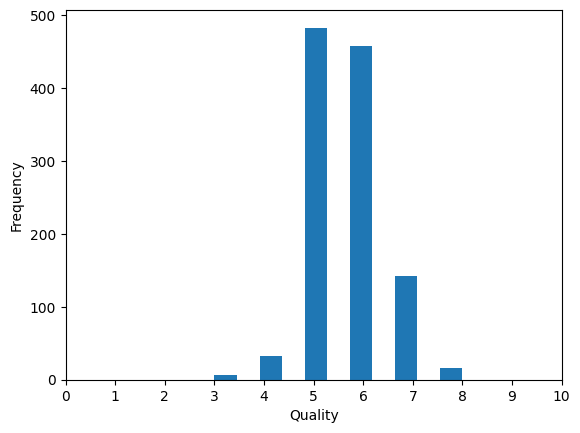

In [24]:
import matplotlib.pyplot as plt

# Créer la figure et les axes
fig, ax = plt.subplots()

# Tracer l'histogramme
ax.hist(df['quality'], bins=11)

# Ajouter des labels aux axes
ax.set_xlabel('Quality')
ax.set_ylabel('Frequency')

# Personnaliser les intervalles de l'axe des x
x_ticks = range(0, 11)  # Plage de 0 à 10
plt.xticks(x_ticks)

# Afficher la figure
plt.show()


Comptons le nombre d'occurence pour chaque note de qualité avec **value_counts**

In [25]:
for i in range(11): 
    
    counts = df['quality'].value_counts().get(i, 0)

    print("Nombre d'occurrences avec quality",i,"=", counts)

Nombre d'occurrences avec quality 0 = 0
Nombre d'occurrences avec quality 1 = 0
Nombre d'occurrences avec quality 2 = 0
Nombre d'occurrences avec quality 3 = 6
Nombre d'occurrences avec quality 4 = 33
Nombre d'occurrences avec quality 5 = 483
Nombre d'occurrences avec quality 6 = 458
Nombre d'occurrences avec quality 7 = 143
Nombre d'occurrences avec quality 8 = 16
Nombre d'occurrences avec quality 9 = 0
Nombre d'occurrences avec quality 10 = 0


Regardons la répartition des valeurs pour chaque colonne. **df.hist()** permet une visualisation de l'ensemble des données.

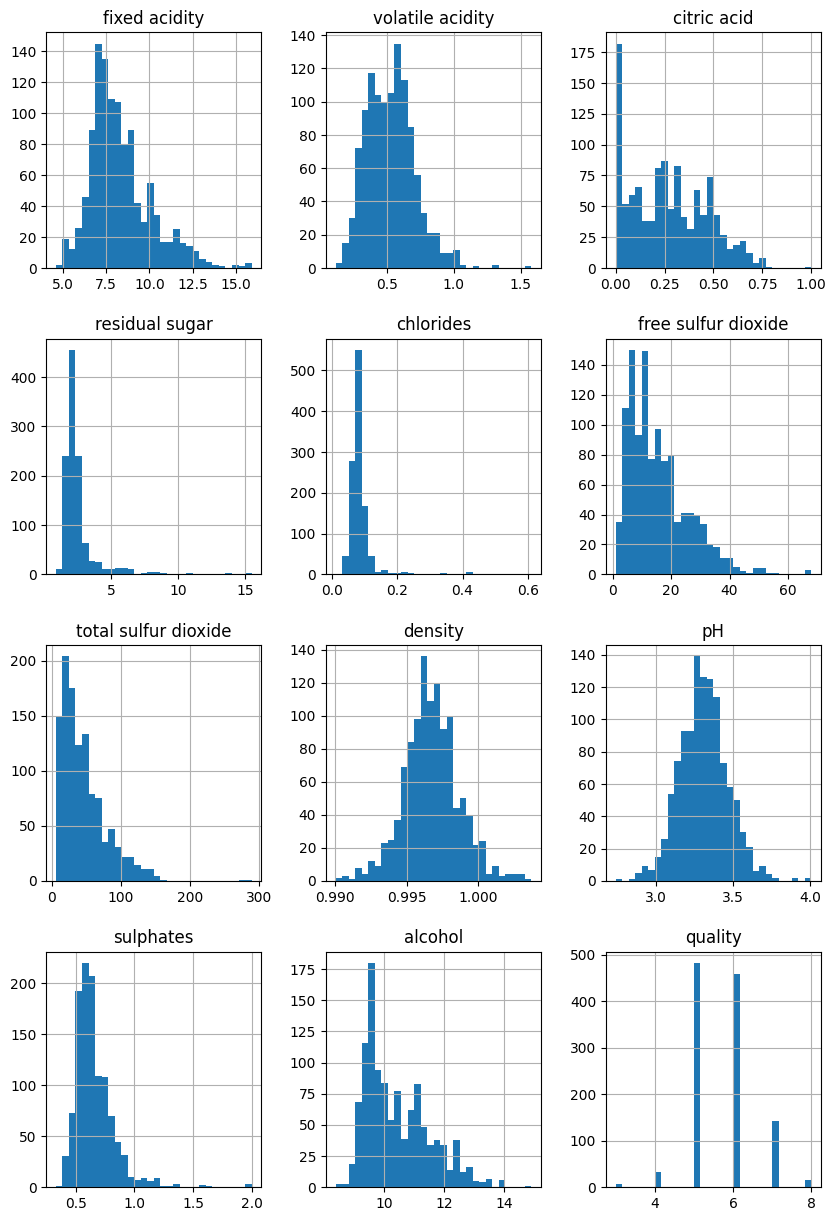

In [26]:
df.hist(bins=30, figsize=(10,15)) # bins représente le nombre de barres de l'histogramme
plt.show()

Utilisons les boxplot pour une visualisation des données complementaires.

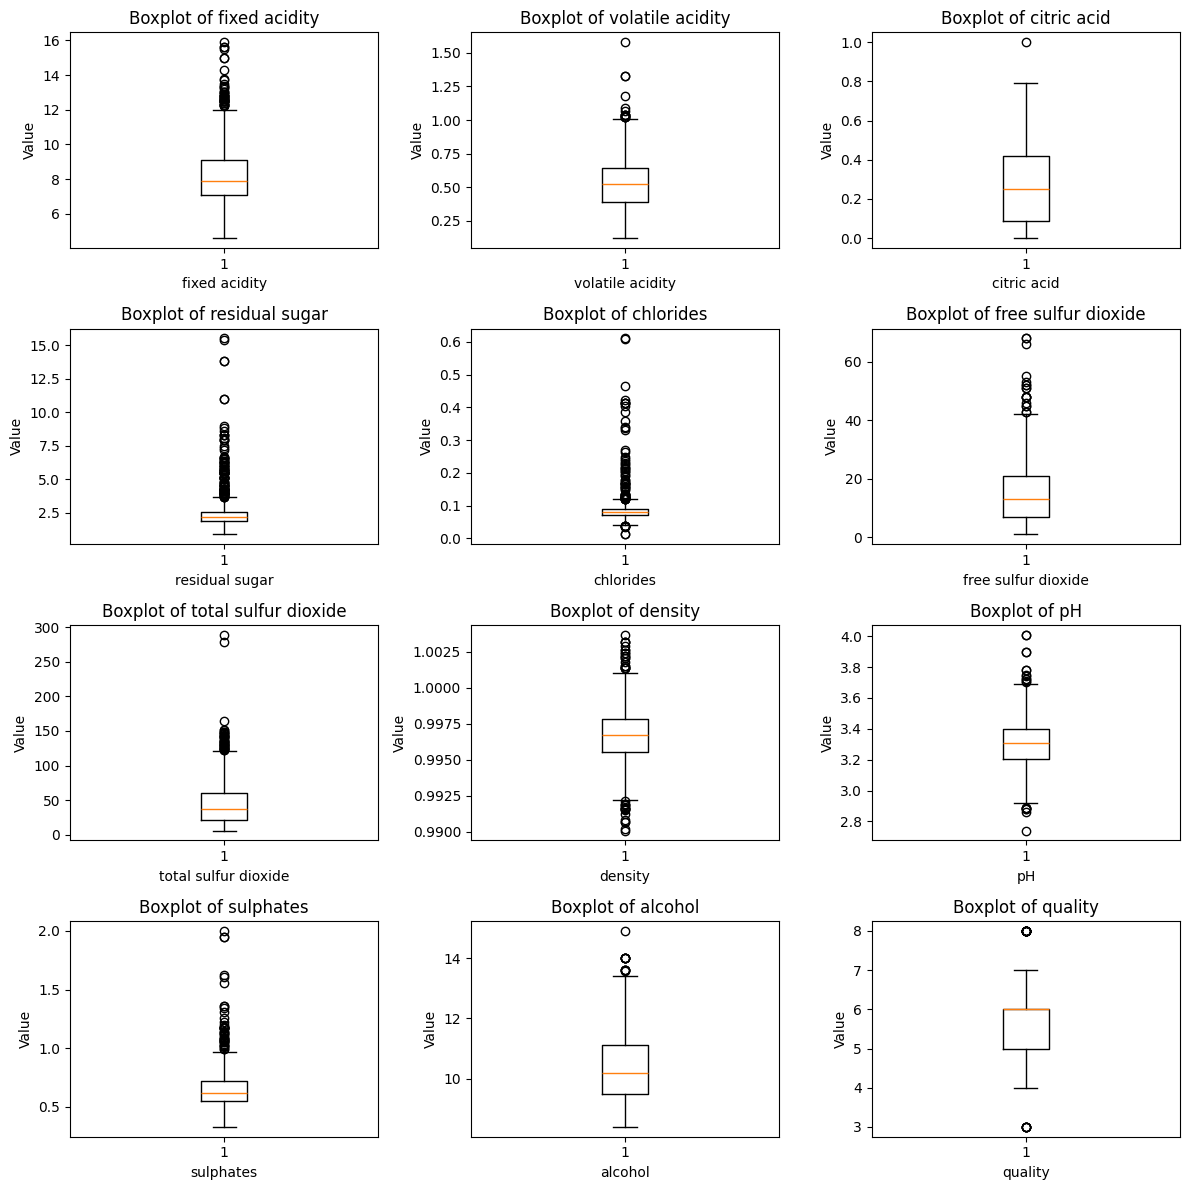

In [27]:

# Créer la figure et les sous-graphiques
fig, axes = plt.subplots(4, 3, figsize=(12, 12))

# Boucle pour tracer les boîtes à moustaches de chaque colonne
for i, column in enumerate(df.columns):
    # Calcul des indices de la position du sous-graphique
    row = i // 3
    col = i % 3
    
    # Tracer la boîte à moustaches de la colonne sur le sous-graphique correspondant
    axes[row, col].boxplot(df[column])
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Value')
    axes[row, col].set_title('Boxplot of ' + column)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


Pour la lecture des Boxplots:

![boxplot](fichiers_cours/pandas/boxplot.png)

- La boîte représente l'étendue interquartile (IQR) des données, c'est-à-dire la plage entre le premier quartile (Q1) et le troisième quartile (Q3). La longueur de la boîte indique la dispersion des données dans cette plage.
    - Le premier quartile (Q1) est la valeur qui divise les données en deux parties, où environ 25% des données sont inférieures à Q1. Cela signifie que 25% des valeurs se trouvent en dessous de Q1.

    - Le troisième quartile (Q3) est la valeur qui divise les données en deux parties, où environ 75% des données sont inférieures à Q3. Cela signifie que 75% des valeurs se trouvent en dessous de Q3.

- La médiane : La ligne orange à l'intérieur de la boîte représente la médiane, qui est la valeur qui divise l'échantillon en deux parties égales. Elle indique la valeur centrale de la distribution.

- Les moustaches : Les moustaches s'étendent à partir de la boîte et représentent la dispersion des données en dehors de l'IQR (inter quartile range). Les moustaches peuvent être dessinées de différentes manières, mais généralement elles s'étendent jusqu'aux valeurs minimale et maximale des données qui ne sont pas des valeurs aberrantes.

- Les points ou les cercles : Les points ou les cercles qui se trouvent en dehors des moustaches représentent les valeurs aberrantes, c'est-à-dire les valeurs qui sont éloignées des autres données. Elles peuvent indiquer des observations inhabituelles ou des valeurs extrêmes.
    

# 7-5 Correlation des données

La matrice de corrélation est un outil statistique qui mesure la force de la relation entre deux variables. Elles sont généralement représentées sous forme d'une matrice où chaque cellule contient le coefficient de corrélation linéaire entre deux variables.

Les coefficients de corrélation peuvent prendre des valeurs comprises entre -1 et 1. Une valeur de 1 indique une corrélation parfaite positive, ce qui signifie que les deux variables augmentent ou diminuent ensemble. Une valeur de -1 indique une corrélation parfaite négative, ce qui signifie que les deux variables augmentent ou diminuent en sens inverse.

Une valeur de 0 indique qu'il n'y a pas de corrélation entre les deux variables.

Calculer la matrice de corrélation de notre dataframe:

In [28]:
corr_matrix = df.corr()
print(corr_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.250792     0.673267   
volatile acidity          -0.250792          1.000000    -0.547647   
citric acid                0.673267         -0.547647     1.000000   
residual sugar             0.172435         -0.005128     0.177605   
chlorides                  0.107540          0.049671     0.238400   
free sulfur dioxide       -0.163992         -0.002747    -0.056540   
total sulfur dioxide      -0.111083          0.077702     0.035627   
density                    0.681419          0.017279     0.375510   
pH                        -0.686051          0.224831    -0.543800   
sulphates                  0.173549         -0.282297     0.326281   
alcohol                   -0.074238         -0.203566     0.109793   
quality                    0.122252         -0.408825     0.241587   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

Utilisons un tracé plus visuel...

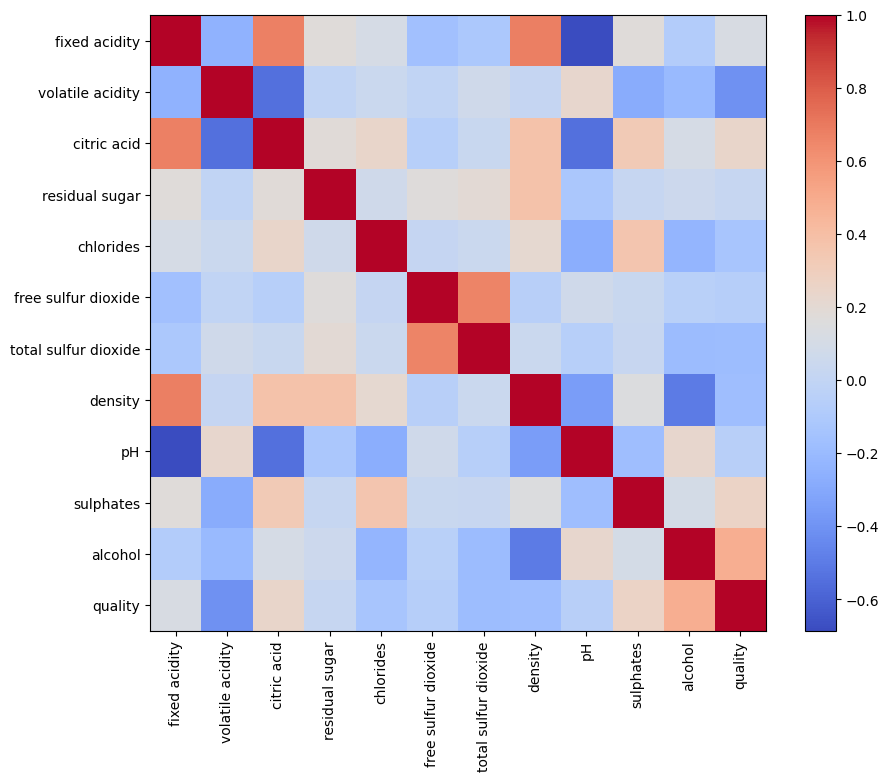

In [29]:
# Créer une figure et un axe pour le tracé
fig, ax = plt.subplots(figsize=(10, 8))

# Tracer la matrice de corrélation avec imshow
im = ax.imshow(corr_matrix, cmap='coolwarm')

# Ajouter une barre de couleur
cbar = ax.figure.colorbar(im, ax=ax)

# Ajouter les étiquettes des axes
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns);

Faisons le plot cette fois avec seaborn pour un affichage donnant plus de précision

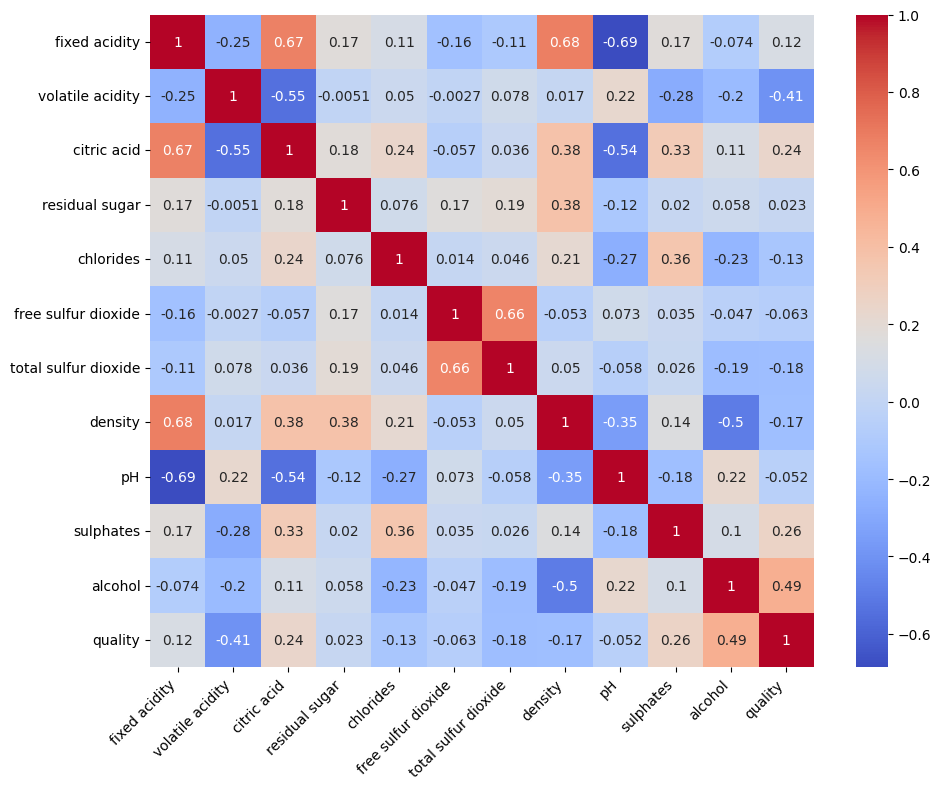

In [31]:
import seaborn as sns

# Créer une figure et un axe pour le tracé
fig, ax = plt.subplots(figsize=(10, 8))

# Tracer la matrice de corrélation avec heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)

# Configurer les étiquettes des axes

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
# Afficher la figure
plt.show()


Que peut on en conclure? Regarder notamment la correlation entre pH et fixed acidity.

Traçons des représentations graphiques des ces correlations, d'abord avec Seaborn

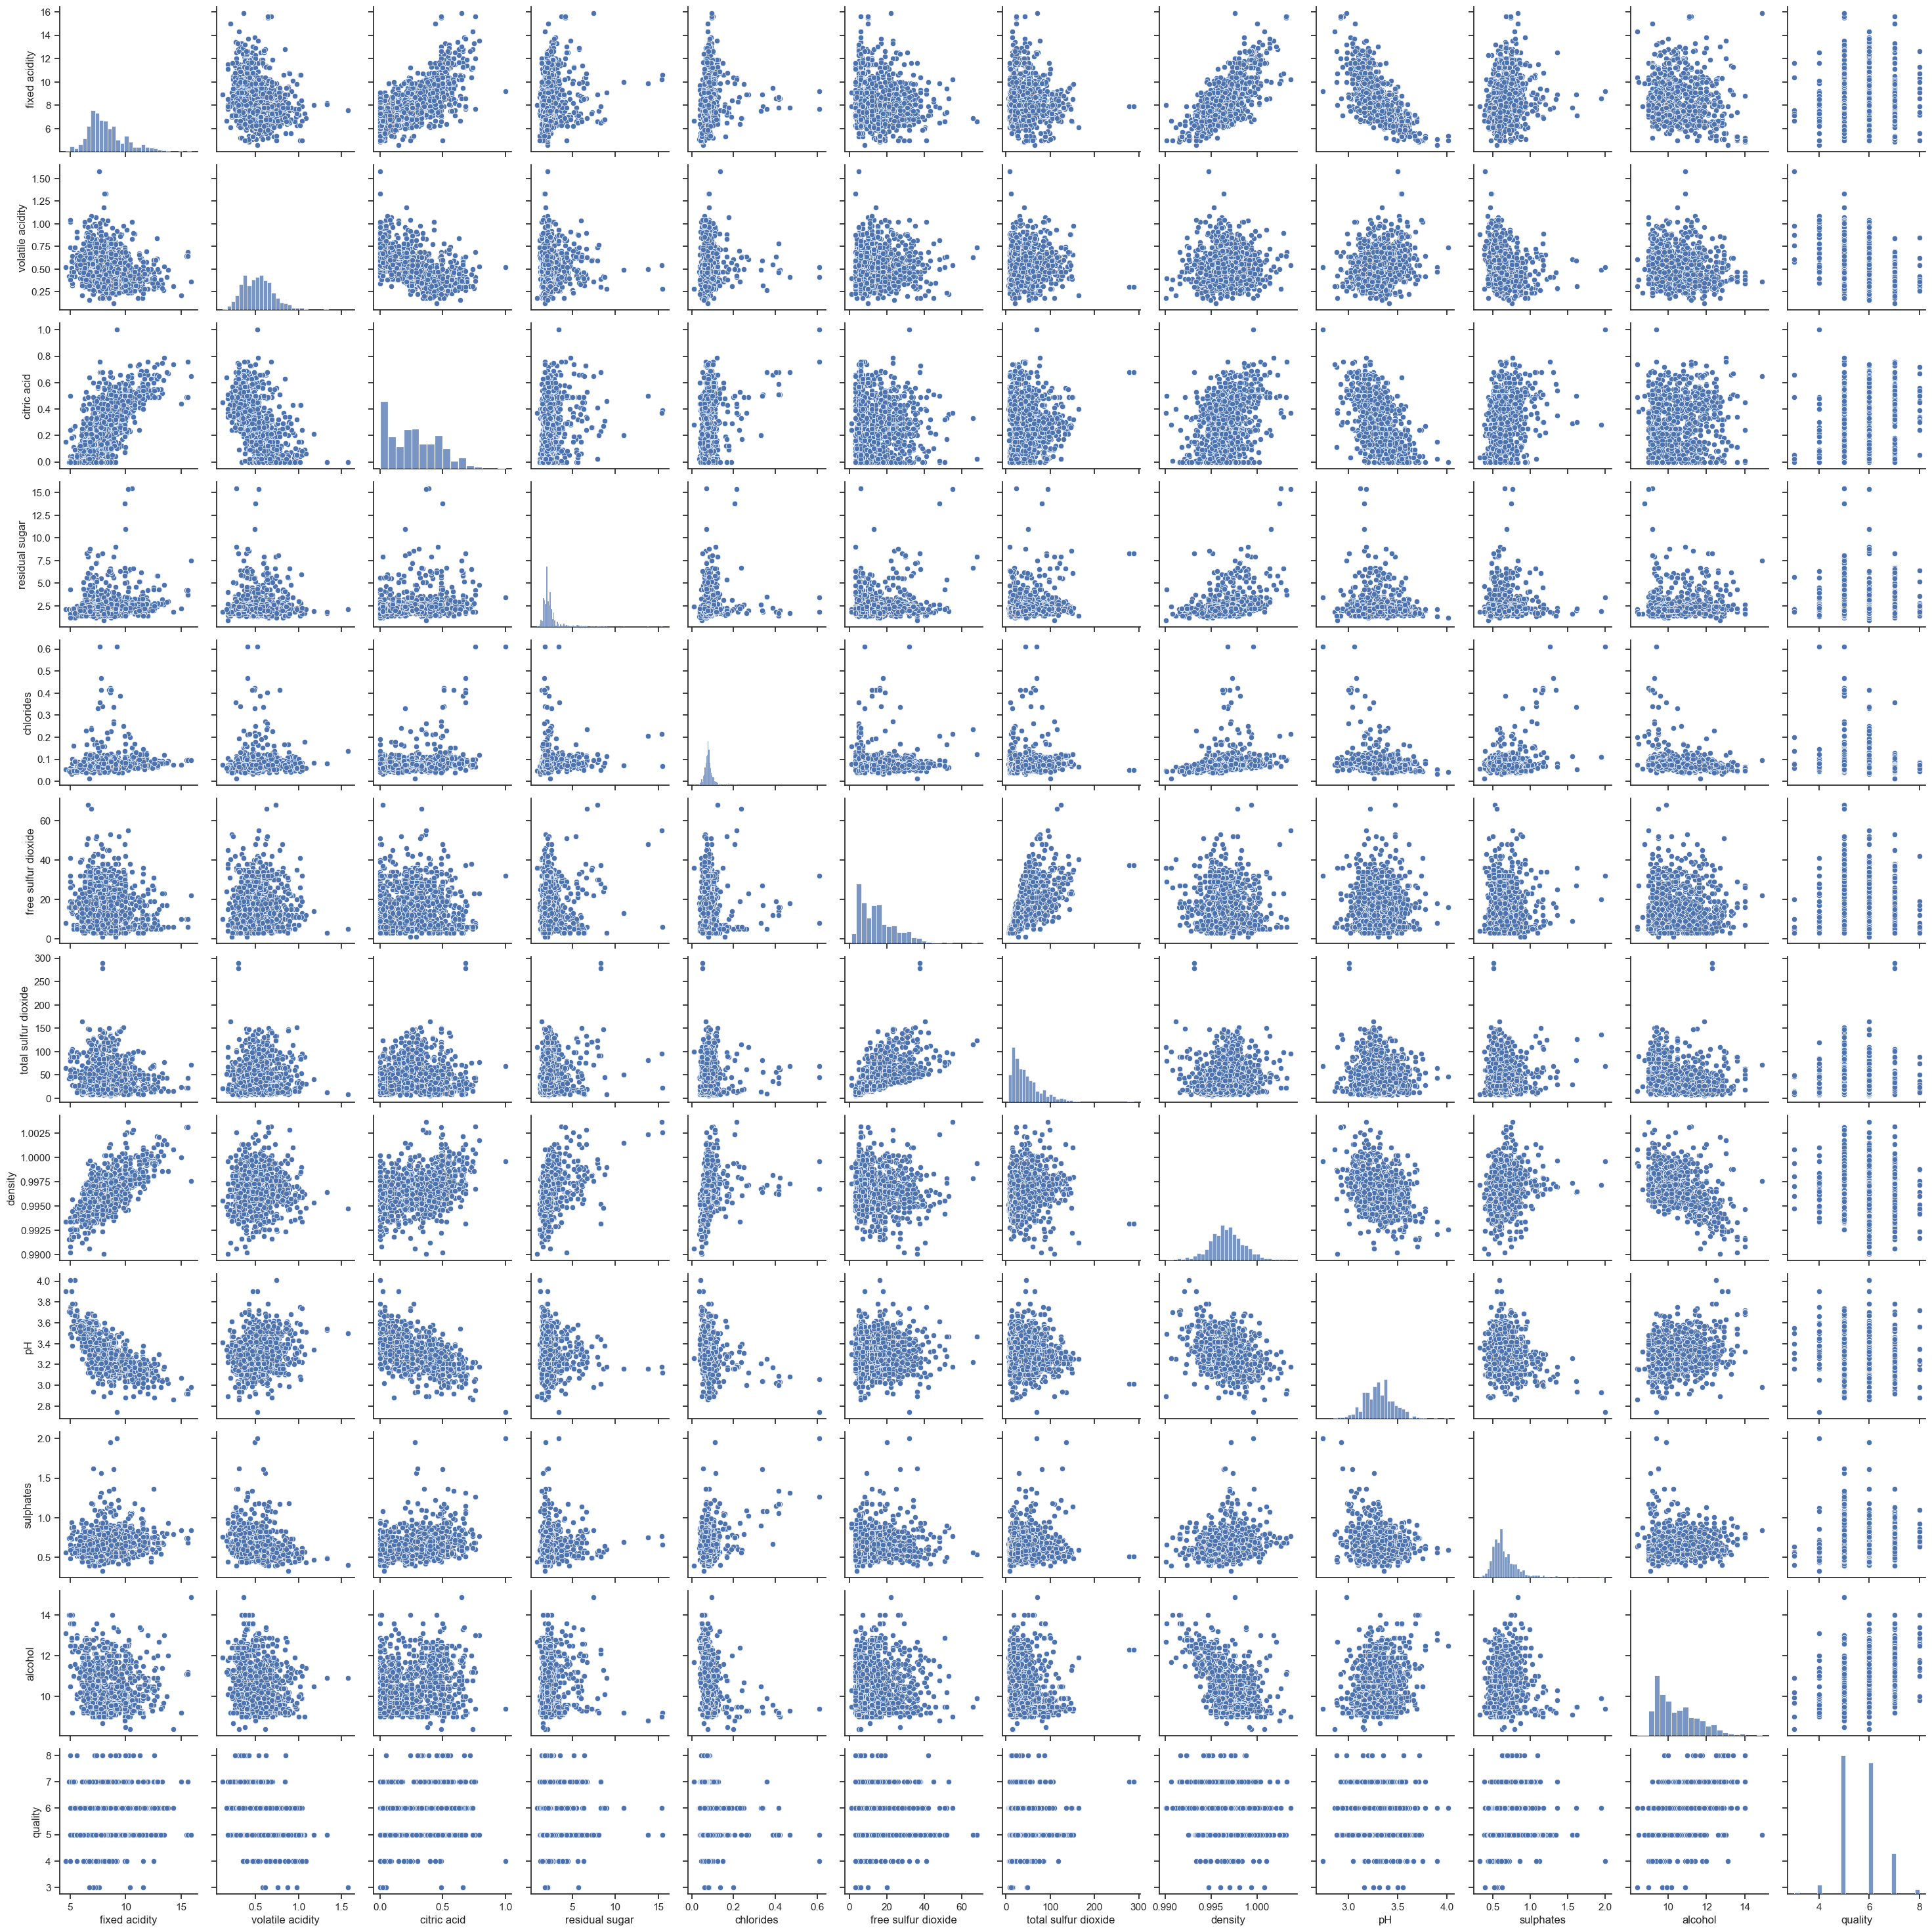

In [32]:
sns.set(style="ticks")

# Créer une matrice de scatter plots
sns.pairplot(df)

# Afficher le graphique
plt.show()

Pandas a aussi des fonctions de plot utilisons **plotting.scatter_matrix** pour réaliser l'équivalent de l'opération précédente

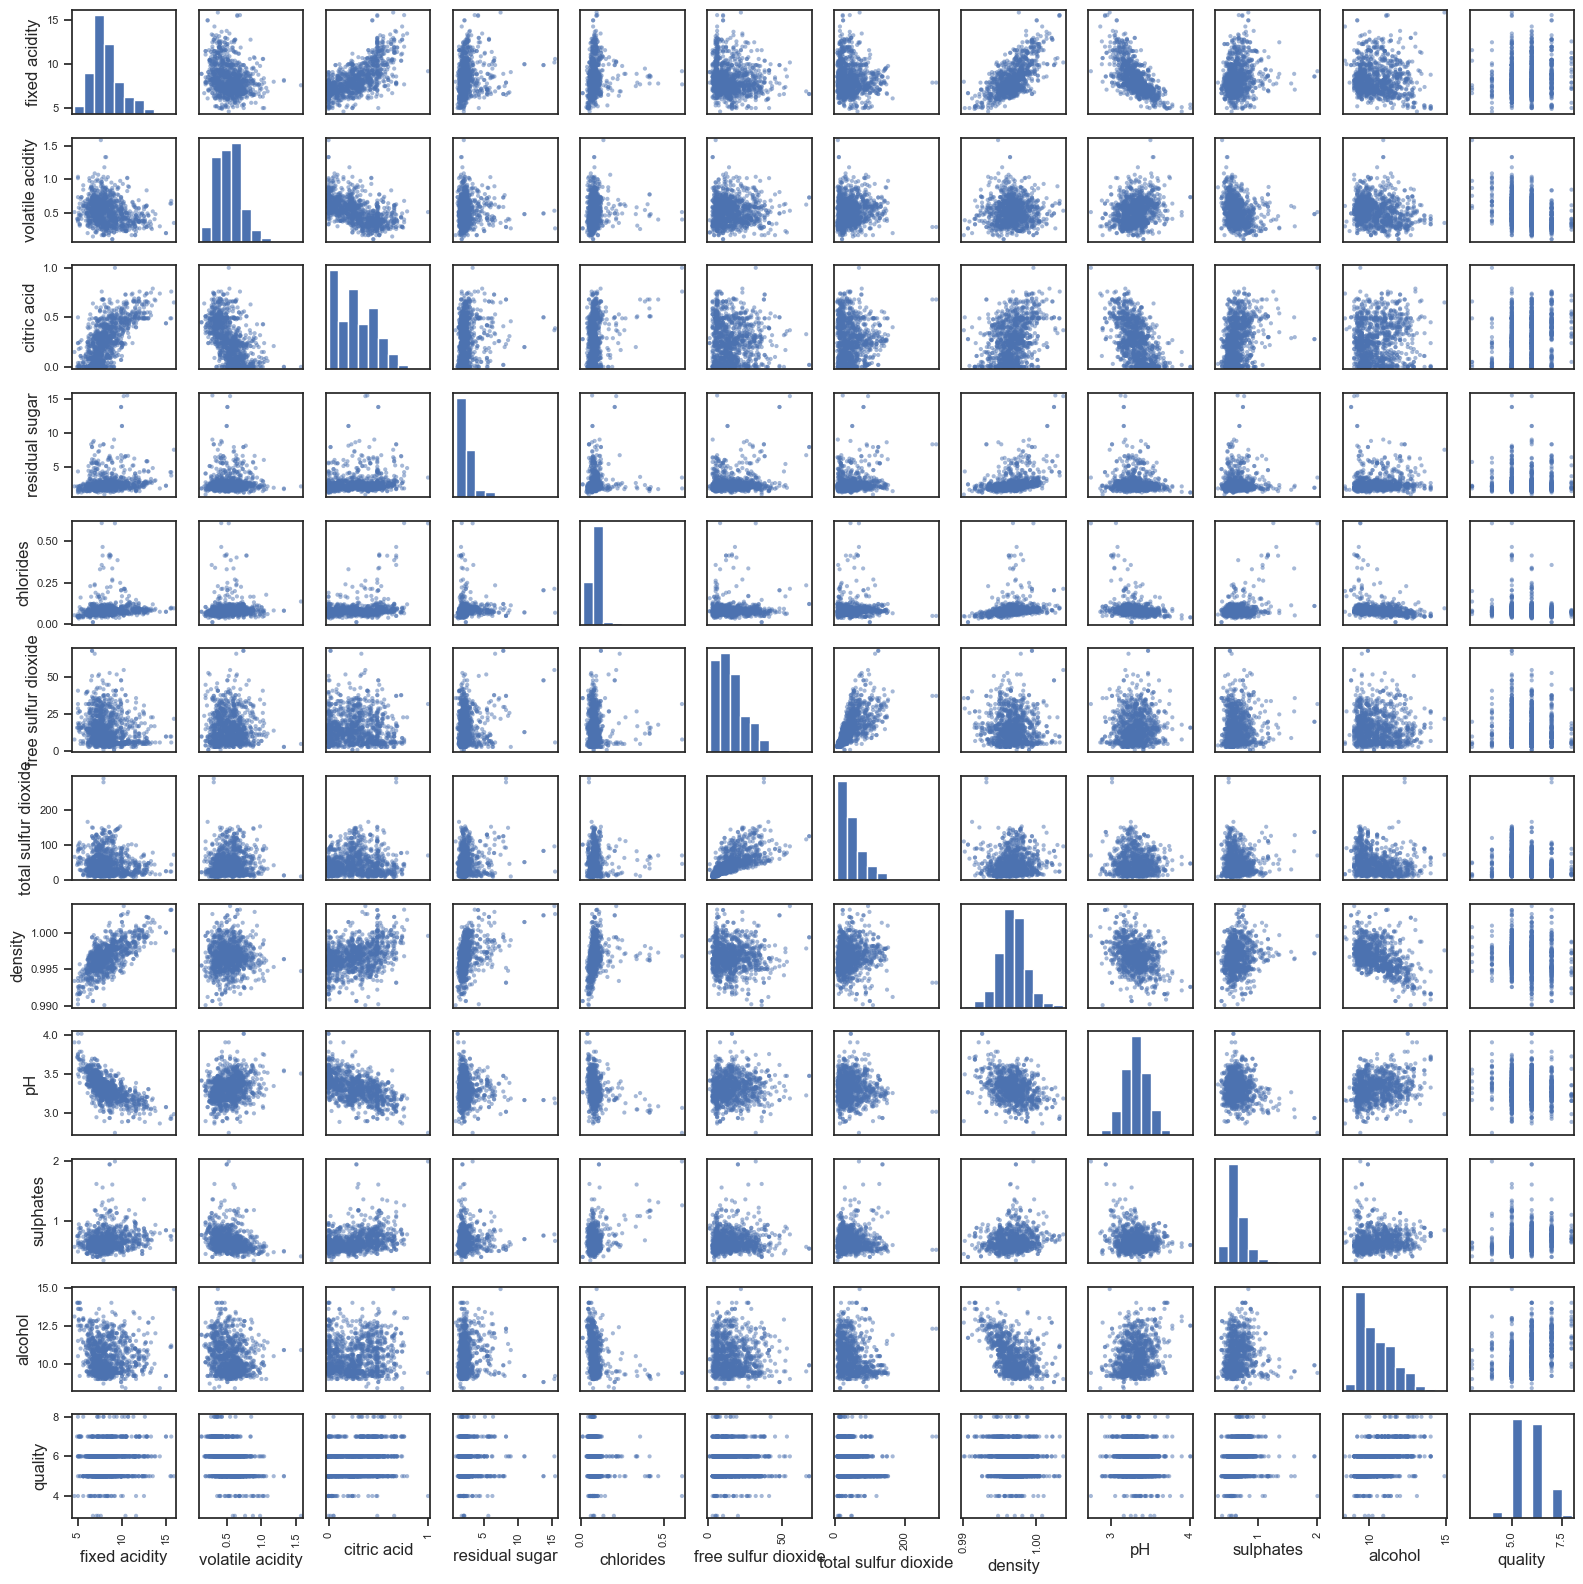

In [33]:
# Tracer la matrice de scatter plots
pd.plotting.scatter_matrix(df, figsize=(16, 16))

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()


# Afficher le graphique
plt.show()


# 7-6 Création et fusion de dataframes

Créeons un dataframe

In [34]:
import numpy as np
# Créer un tableau NumPy
data_array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
# Créer un DataFrame à partir du tableau NumPy
df = pd.DataFrame(data_array)
# Afficher le DataFrame
print(df)

    0   1   2
0   1   2   3
1   4   5   6
2   7   8   9
3  10  11  12


Ajoutons des noms de lignes et de colonnes

In [35]:
df.index = ['ligne1', 'ligne2', 'ligne3', 'ligne4']
df.columns = ['colonne1', 'colonne2', 'colonne3']
print(df)

        colonne1  colonne2  colonne3
ligne1         1         2         3
ligne2         4         5         6
ligne3         7         8         9
ligne4        10        11        12


On a aussi la possibité de réaliser la création et le remplissage en étape avec l'utilisation d'un dictionnaire

In [36]:
data = {'ligne1': [1, 2, 3], 'ligne2': [4, 5, 6], 'ligne3': [7, 8, 9], 'ligne4': [10, 11, 12]}
df = pd.DataFrame.from_dict(data,orient='index', columns=['colonne1', 'colonne2', 'colonne3'])
# Afficher le DataFrame
print(df)

        colonne1  colonne2  colonne3
ligne1         1         2         3
ligne2         4         5         6
ligne3         7         8         9
ligne4        10        11        12


Ajoutons maintenant une ligne à df

In [37]:
nouvelle_ligne = [13, 14, 15]
# Ajouter la nouvelle ligne en utilisant la méthode loc
df.loc['ligne5'] = nouvelle_ligne
print(df)

        colonne1  colonne2  colonne3
ligne1         1         2         3
ligne2         4         5         6
ligne3         7         8         9
ligne4        10        11        12
ligne5        13        14        15


Créeons maintenant un deuxieme dataframe 

In [38]:
data_array2 = np.array([[100, 200, 300], [400, 500, 600], [700, 800, 900]])
df2 = pd.DataFrame(data_array2)
df2.index = ['ligne1_1', 'ligne2_1', 'ligne3_1']
df2.columns = ['colonne1', 'colonne2', 'colonne3']
print(df2)


          colonne1  colonne2  colonne3
ligne1_1       100       200       300
ligne2_1       400       500       600
ligne3_1       700       800       900


Faisons la concaténation des lignes des deux DataFrames

In [39]:
# Concaténer les lignes des deux DataFrames
df_concatenated = pd.concat([df, df2])#, ignore_index=True)

# Afficher le DataFrame concaténé
print(df_concatenated)

          colonne1  colonne2  colonne3
ligne1           1         2         3
ligne2           4         5         6
ligne3           7         8         9
ligne4          10        11        12
ligne5          13        14        15
ligne1_1       100       200       300
ligne2_1       400       500       600
ligne3_1       700       800       900


Ajoutons maintenant une colonne à df_concatenated

In [40]:
df_concatenated['colonne 4'] = [1, 2, 3, 4, 5, 6, 7, 8]

# Afficher le DataFrame avec la nouvelle colonne
print(df_concatenated)

          colonne1  colonne2  colonne3  colonne 4
ligne1           1         2         3          1
ligne2           4         5         6          2
ligne3           7         8         9          3
ligne4          10        11        12          4
ligne5          13        14        15          5
ligne1_1       100       200       300          6
ligne2_1       400       500       600          7
ligne3_1       700       800       900          8


# 7-7 Quelques fonctions suplémentaires

Créons un dataframe d'exemple

In [41]:
data = {
    "Sex": ['M', 'F', 'M', 'F', 'M'],
    "Age": [24, 32, 28, 29, 35],
    "Weight": [75, 62, 80, 55, 70],
    "Height": [180, 165.5, 175, 170.3, 185.6]  # Tailles en cm, certains en int, d'autres en float
}

df = pd.DataFrame(data)

print(df)

  Sex  Age  Weight  Height
0   M   24      75   180.0
1   F   32      62   165.5
2   M   28      80   175.0
3   F   29      55   170.3
4   M   35      70   185.6


## 7-7-1 Remplacer des valeurs

Remplaçons les valeurs sex par des valeurs numeriques avec

In [42]:
df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1})
print(df)

   Sex  Age  Weight  Height
0    0   24      75   180.0
1    1   32      62   165.5
2    0   28      80   175.0
3    1   29      55   170.3
4    0   35      70   185.6


C:\Users\cayez\AppData\Local\Temp\ipykernel_22544\246894475.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1})


## 7-7-2 Compter un nombre d'occurences

In [43]:
nombre_de_femmes = df['Sex'].value_counts()[1]
print(nombre_de_femmes)

2


[Exercice 2](exercices/Exercices7.ipynb)